<a href="https://colab.research.google.com/github/kjbhardwaj99/Teleco-Churn-Predciction-Classification/blob/main/Project_Logistic_Regression_Teleco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv('/content/drive/MyDrive/data sci/project/Classification/Telecome churn /WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.dtypes.to_frame().rename({0:'dtype'})

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean()).astype(int)

df.drop(columns=['customerID'],inplace=True)

In [9]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

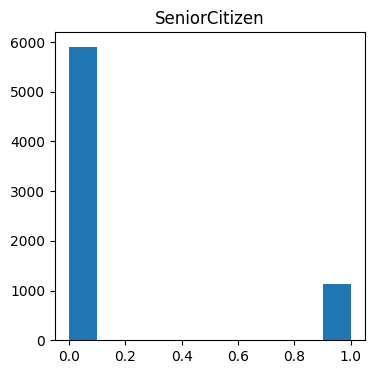

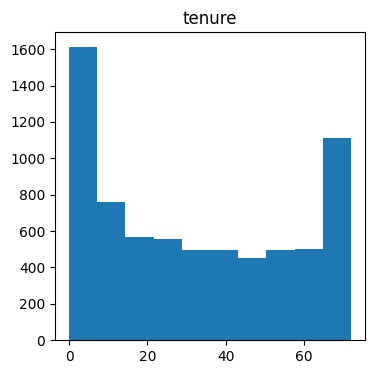

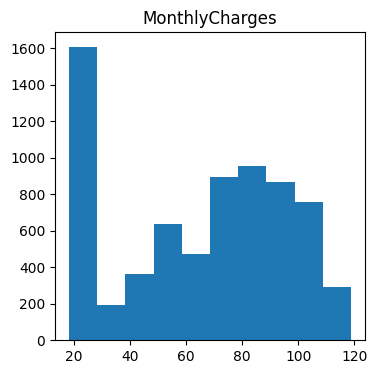

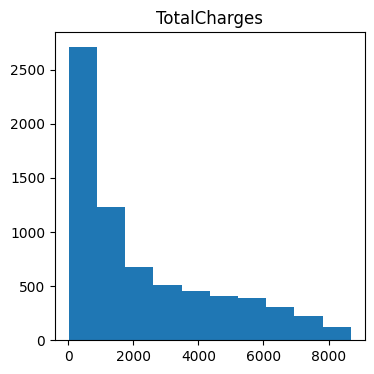

In [10]:
for i in df.describe().columns.to_list():
  fig=plt.figure(figsize=(4,4))
  ax=plt.gca()
  ax.hist(df[i])
  ax.set_title(i)

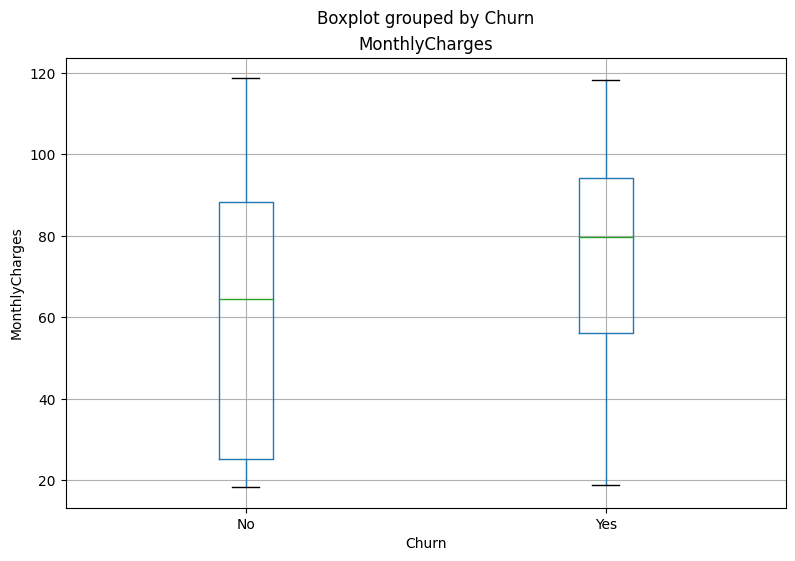

In [11]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

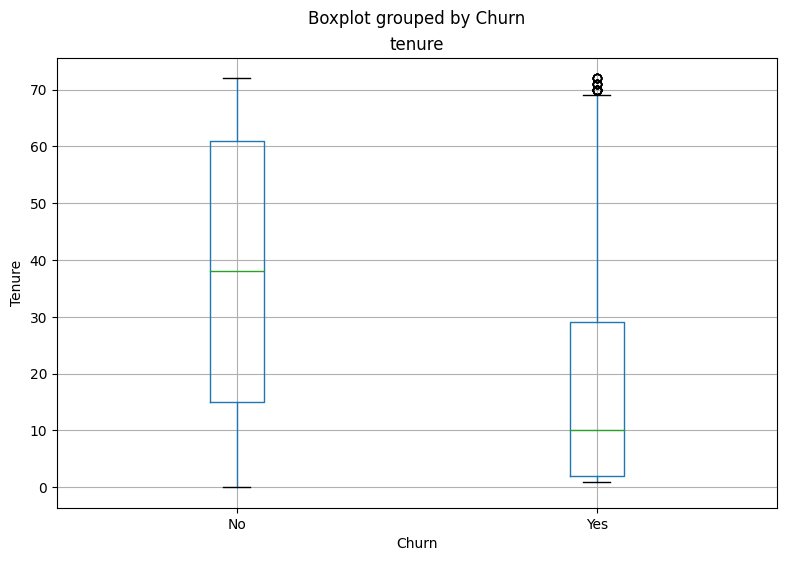

In [12]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

In [13]:
cat_feature=[i for i in df.columns.to_list() if i not in df.describe().columns.to_list()]

In [14]:
for i in cat_feature:
  print(i,' : ',df[i].unique())

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [15]:
for i in cat_feature:
  print(i,' : ',df[i].nunique())

gender  :  2
Partner  :  2
Dependents  :  2
PhoneService  :  2
MultipleLines  :  3
InternetService  :  3
OnlineSecurity  :  3
OnlineBackup  :  3
DeviceProtection  :  3
TechSupport  :  3
StreamingTV  :  3
StreamingMovies  :  3
Contract  :  3
PaperlessBilling  :  2
PaymentMethod  :  4
Churn  :  2


In [16]:
dummy=[]
for i in cat_feature:
  if df[i].nunique()==2:
    df[i]=df[i].apply(lambda x:0 if x==df[i].unique()[0] else 1)
  else:
    dummy.append(i)
df=pd.get_dummies(df,columns=dummy,dtype=int,drop_first=True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,0,29.85,29,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,34,1,1,56.95,1889,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,0,2,1,0,53.85,108,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,45,0,1,42.30,1840,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,2,1,0,70.70,151,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
df.dtypes.to_frame()

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
PaperlessBilling,int64
MonthlyCharges,float64
TotalCharges,int64
Churn,int64


In [19]:
dependent_variabe='Churn'

features=[i for i in df.columns.to_list() if i not in [dependent_variabe]]

print(features)
print(len(features))

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
30


In [20]:
X=df[features].values
y=df[dependent_variabe].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5634, 30)
(1409, 30)


In [22]:
y

array([0, 0, 1, ..., 0, 1, 0])

## **LogisticRegression**

In [23]:
Logistic_model=LogisticRegression(max_iter=1000,fit_intercept=True).fit(X_train,y_train)

In [24]:
Logistic_model.intercept_

array([-0.06359623])

In [25]:
y_preds = Logistic_model.predict_proba(X_test)

In [26]:
y_preds[:,1]

array([0.17574507, 0.09421063, 0.43222525, ..., 0.29513277, 0.1951567 ,
       0.47635661])

In [27]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [28]:
test_preds = Logistic_model.predict(X_test)
train_preds = Logistic_model.predict(X_train)

**Model Evalution**

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

**Accuracy Scores**

In [30]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8072417465388712
The accuracy on test data is  0.794180269694819


**Confusion Matrix**

[[931 110]
 [180 188]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

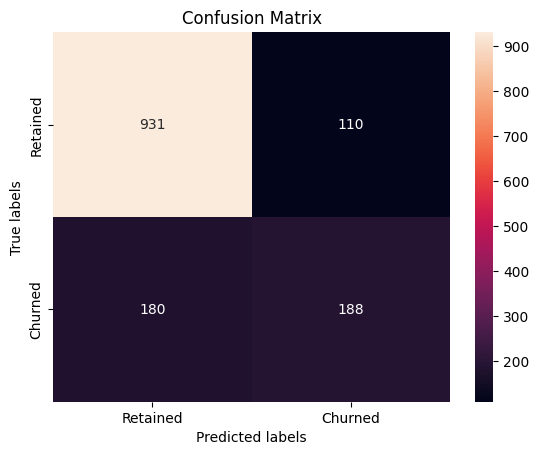

In [31]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm,fmt='d', annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [32]:
print('Precision : ',(931+110)/931)

Precision :  1.1181525241675618


## **Cross Validation logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegressionCV

import warnings  # Importing warnings to handle warnings
warnings.filterwarnings('ignore')  # Ignoring warnings for cleaner output

In [34]:
cv_logistic_model=LogisticRegressionCV(cv=5).fit(X_train, y_train)

In [35]:
cv_logistic_model

LogisticRegressionCV(cv=5)

In [36]:
cv_log_pred=cv_logistic_model.predict(X_test)

In [37]:
test_accuracy = accuracy_score(cv_log_pred,y_test)


print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.7970191625266146


## **Descision Tree**

In [38]:
dependent_variabe='Churn'

features=[i for i in df.columns.to_list() if i not in [dependent_variabe]]

print(features)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, auc


In [40]:
X = df[features]
y = df[dependent_variabe]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=324)


In [42]:
defaulter_classifier = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=3, random_state=0)
defaulter_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [43]:

y_predicted = defaulter_classifier.predict(X_test)
accuracy_score(y_test, y_predicted) * 100


79.55997161107167

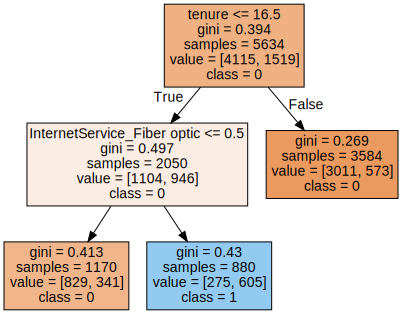

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(defaulter_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1']
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## **Random Forest**


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
# Hyperparameter tuning

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [47]:
test_preds  = classifier.predict(X_test)
# Obtain accuracy on test set
accuracy_score(y_test,test_preds)

0.7991483321504613

# **Ensemble**

# **Voting**

In [48]:
from sklearn.ensemble import VotingClassifier

In [49]:
estimators=[('lr',LogisticRegression()),('dc',DecisionTreeClassifier()),('rf',RandomForestClassifier())]

In [50]:
vc=VotingClassifier(estimators=estimators,voting='soft')

In [51]:
vc

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dc', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [52]:
voting_model=vc.fit(X_train,y_train)

In [53]:
test_preds = voting_model.predict(X_test)
train_preds = voting_model.predict(X_train)

# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9978700745473909
The accuracy on test data is  0.7792760823278921


## **Bagging**

Accuracy: 0.7970191625266146
Confusion Matrix:
 [[953 106]
 [180 170]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1059
           1       0.62      0.49      0.54       350

    accuracy                           0.80      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



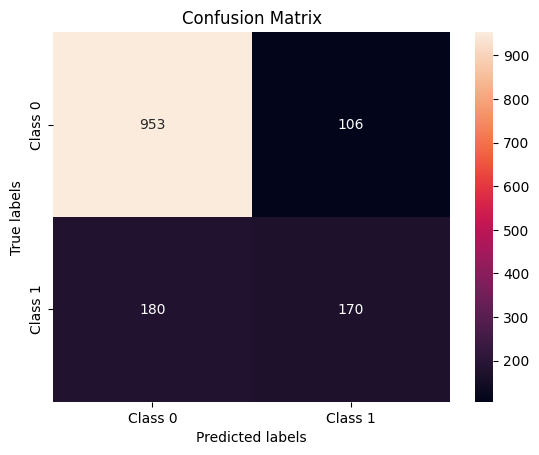

In [54]:

from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


# Define the base model
base_model = DecisionTreeClassifier()

# Create a Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50, random_state=42)

# Fit the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', report)

# Plotting the confusion matrix
labels = ['Class 0', 'Class 1']
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

Accuracy: 0.7920511000709723
Confusion Matrix:
 [[935 124]
 [169 181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1059
           1       0.59      0.52      0.55       350

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



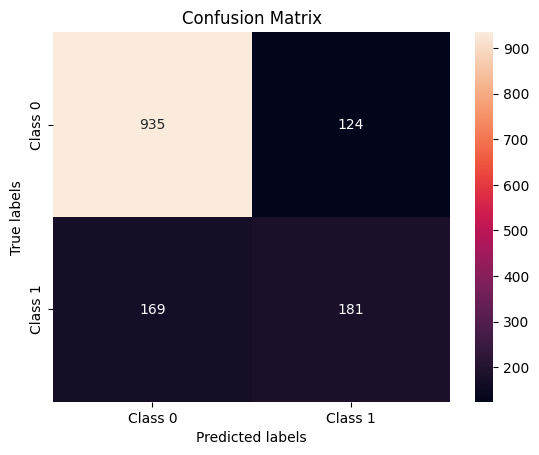

In [55]:
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


# Define the base model
base_model = LogisticRegression()

# Create a Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=50, random_state=42)

# Fit the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', report)

# Plotting the confusion matrix
labels = ['Class 0', 'Class 1']
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()